In [1]:
import os
import pandas as pd
import geopandas as gpd
import re
import string
import unicodedata
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns
import matplotlib.cm as cm

In [18]:
manchester_map = gpd.read_file('manchester_boundary.shp')


In [24]:
manchester_map = manchester_map.to_crs('epsg:27700')

<AxesSubplot:>

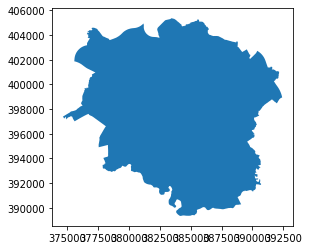

In [25]:
manchester_map.plot()

In [31]:
local_authority = gpd.read_file('LAD_MAY_2021_UK_BFE_V2.shp')

In [42]:
local_authority

,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry
0,1,E06000001,Hartlepool,447160,531474,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,2,E06000002,Middlesbrough,451141,516887,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,3,E06000003,Redcar and Cleveland,464361,519597,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,4,E06000004,Stockton-on-Tees,444940,518183,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,5,E06000005,Darlington,428029,515648,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...,...
369,370,W06000020,Torfaen,327459,200480,-3.05101,51.698360,82544.770980,1.262399e+08,"POLYGON ((323898.201 211287.499, 324115.698 21..."
370,371,W06000021,Monmouthshire,337812,209231,-2.90280,51.778271,250879.753346,8.860439e+08,"MULTIPOLYGON (((345965.201 181030.700, 345944...."
371,372,W06000022,Newport,337897,187432,-2.89769,51.582310,135651.510102,2.175180e+08,"POLYGON ((342211.900 194845.495, 342221.803 19..."
372,373,W06000023,Powys,302329,273255,-3.43531,52.348640,606560.015329,5.195456e+09,"POLYGON ((322392.901 334017.198, 322378.002 33..."


In [37]:
man = local_authority[local_authority['LAD21NM']=='Manchester']

In [39]:
man = man.to_crs('epsg:27700')

<AxesSubplot:>

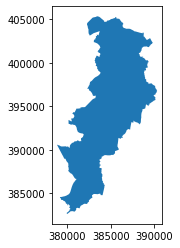

In [40]:
man.plot()

In [70]:
url='./DV_CSC8626_Data_Wrangled/Datafile_003.csv'

In [71]:
data_003 = pd.read_csv(url)

In [72]:
data_003.head(4)

,x,y,cell_id,population,infected_DM_0,infected_DM_1,infected_DM_2,infected_DM_3,u,var,sd,IoD,CoV
0,-2.265692,53.444722,-7.903445e+18,59,0,1,1,2,1.00,0.666667,0.816497,0.666667,0.816497
1,-2.265782,53.459104,8.320480e+18,166,1,1,1,1,1.00,0.000000,0.000000,0.000000,0.000000
2,-2.265860,53.471687,3.409798e+18,125,1,0,1,0,0.50,0.333333,0.577350,0.666667,1.154701
3,-2.265990,53.492360,-2.365719e+18,62,0,0,1,0,0.25,0.250000,0.500000,1.000000,2.000000


In [75]:
data_003.iloc[3].u

0.25

In [10]:
gdf_data_000 = gpd.GeoDataFrame(data_000, geometry=gpd.points_from_xy(data_000.x, data_000.y, crs='epsg:4326'))

In [12]:
gdf_data_000 = gdf_data_000.to_crs('epsg:27700')

<AxesSubplot:>

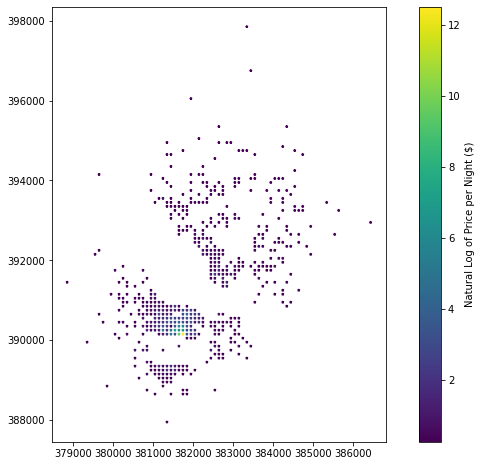

In [43]:
gdf_data_000.plot(column='u',marker='*', markersize=5,figsize=(12,8),legend=True,legend_kwds={'label': "Natural Log of Price per Night ($)",
                        'orientation': "vertical"})

In [56]:
def data_read_plot(url):
    '''
    print out the shape of a dataframe, the percentage of features without missing values and the columns with high missing rates
    '''
    data = pd.read_csv(url)
    gdf_data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.x, data.y, crs='epsg:4326'))
    gdf_data_crs = gdf_data.to_crs('epsg:27700')
    
    fig, ax = plt.subplots(1,1, figsize=(12,9))
    manchester_map.plot(ax=ax,edgecolor='r',facecolor= 'white',linewidth=1)
    gdf_data_crs.plot(ax=ax,column='u',marker='*', markersize=0.25,figsize=(12,8),legend=True,legend_kwds={'label': "Average number of infections",
                        'orientation': "vertical"})
    

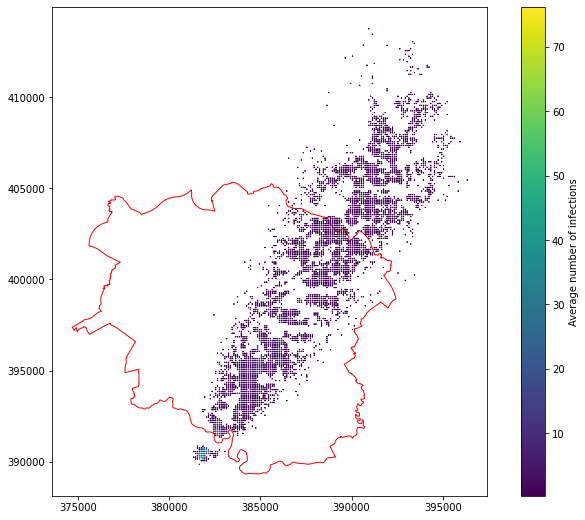

In [60]:
data_read_plot("./DV_CSC8626_Data_Wrangled/Datafile_249.csv")

In [63]:
for i in range(0,250):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [92]:
def data_aggregate(m,n):
    
    cell_dic = {}
    
    for i in range(m,n):
        if i <10:
            url = './DV_CSC8626_Data_Wrangled/Datafile_00' + str(i) +'.csv'
        elif i<100:
            url = './DV_CSC8626_Data_Wrangled/Datafile_0' + str(i) +'.csv'
        else:
            url = './DV_CSC8626_Data_Wrangled/Datafile_' + str(i) +'.csv'
        
        data = pd.read_csv(url)
        for j in range(len(data)):
            
            #cell_dict[some_key] = my_dict.get(some_key, 0)
            
            cell_dic[data.iloc[j].cell_id] = cell_dic.get(data.iloc[j].cell_id, 0)+ data.iloc[j].u
            
            #cell_dic[data.iloc[j].cell_id] = cell_dic[data.iloc[j].cell_id] + data.iloc[j].u
            
    return pd.DataFrame(cell_dic.items(),columns=['cell_id', 'sum'])
            
        

In [113]:
def cell_coordinate(m,n):
    
    #cell_coord = {}
    cell_DataFrame = pd.DataFrame()
    for i in range(m,n):
        if i <10:
            url = './DV_CSC8626_Data_Wrangled/Datafile_00' + str(i) +'.csv'
        elif i<100:
            url = './DV_CSC8626_Data_Wrangled/Datafile_0' + str(i) +'.csv'
        else:
            url = './DV_CSC8626_Data_Wrangled/Datafile_' + str(i) +'.csv'
        
        data = pd.read_csv(url)
        cell_DataFrame = cell_DataFrame.append(data)
        

        
        
        #for j in range(len(data)):
            
            #cell_dict[some_key] = my_dict.get(some_key, 0)
            
           # cell_dic[data.iloc[j].cell_id] = cell_dic.get(data.iloc[j].cell_id, 0)
            
            #cell_dic[data.iloc[j].cell_id] = cell_dic[data.iloc[j].cell_id] + data.iloc[j].u
            
    return cell_DataFrame.drop_duplicates(subset=['cell_id'])

In [132]:
a = cell_coordinate(0,100)

In [133]:
a = a[['cell_id','x','y']]

In [134]:
a

,cell_id,x,y
0,6.504529e+18,-2.265540,53.420453
1,8.685601e+18,-2.265596,53.429442
2,-6.954263e+18,-2.265664,53.440228
3,6.558309e+18,-2.262437,53.405180
4,-7.941757e+17,-2.262481,53.412371
...,...,...,...
3638,7.008726e+18,-2.218068,53.552680
3759,8.633882e+18,-2.207260,53.503263
4197,-2.422178e+18,-2.139779,53.613019
4198,-3.191265e+17,-2.138282,53.617514


In [135]:
test_100 = data_aggregate(0,100)

In [136]:
test_100

,cell_id,sum
0,6.504529e+18,154.50
1,8.685601e+18,141.00
2,-6.954263e+18,119.50
3,6.558309e+18,82.75
4,-7.941757e+17,70.50
...,...,...
17011,7.008726e+18,0.25
17012,8.633882e+18,0.25
17013,-2.422178e+18,0.25
17014,-3.191265e+17,0.25


In [137]:
test_100_pdf = pd.merge(test_100, a, how='outer', on = 'cell_id')

In [138]:
test_100_pdf

,cell_id,sum,x,y
0,6.504529e+18,154.50,-2.265540,53.420453
1,8.685601e+18,141.00,-2.265596,53.429442
2,-6.954263e+18,119.50,-2.265664,53.440228
3,6.558309e+18,82.75,-2.262437,53.405180
4,-7.941757e+17,70.50,-2.262481,53.412371
...,...,...,...,...
17011,7.008726e+18,0.25,-2.218068,53.552680
17012,8.633882e+18,0.25,-2.207260,53.503263
17013,-2.422178e+18,0.25,-2.139779,53.613019
17014,-3.191265e+17,0.25,-2.138282,53.617514


<AxesSubplot:>

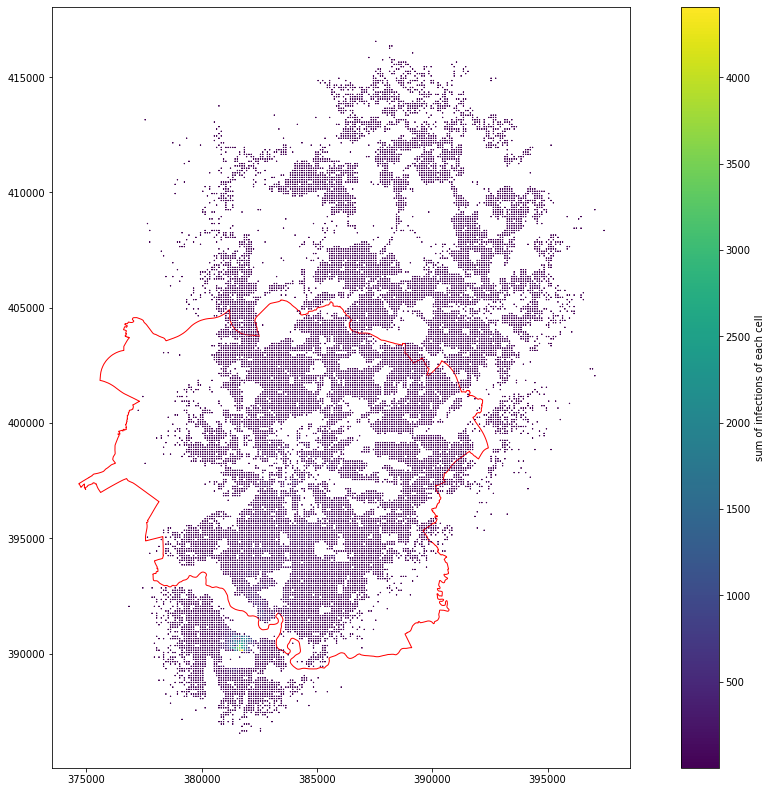

In [140]:
gdf_test_100 = gpd.GeoDataFrame(test_100_pdf, geometry=gpd.points_from_xy(test_100_pdf.x, test_100_pdf.y, crs='epsg:4326'))
gdf_test_100 = gdf_test_100.to_crs('epsg:27700')
    
fig, ax = plt.subplots(1,1, figsize=(18,14))
manchester_map.plot(ax=ax,edgecolor='r',facecolor= 'white',linewidth=1)
gdf_test_100.plot(ax=ax,column='sum',marker='*', markersize=0.25,legend=True,legend_kwds={'label': "sum of infections of each cell",
                        'orientation': "vertical"})

In [141]:
gdf_test_100.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17016 entries, 0 to 17015
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   cell_id   17016 non-null  float64 
 1   sum       17016 non-null  float64 
 2   x         17016 non-null  float64 
 3   y         17016 non-null  float64 
 4   geometry  17016 non-null  geometry
dtypes: float64(4), geometry(1)
memory usage: 797.6 KB


In [142]:
gdf_test_100.to_file('test_100_geo.gpkg', driver='GPKG')

In [143]:
test = gpd.read_file('test_100_geo.gpkg')

<AxesSubplot:>

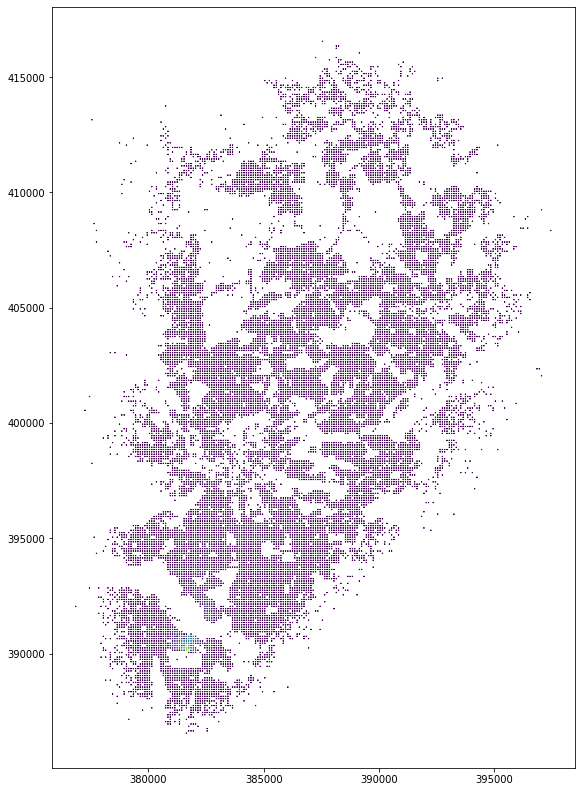

In [147]:
test.plot(column='sum',marker='*', markersize=0.25,figsize=(18,14))

<AxesSubplot:>

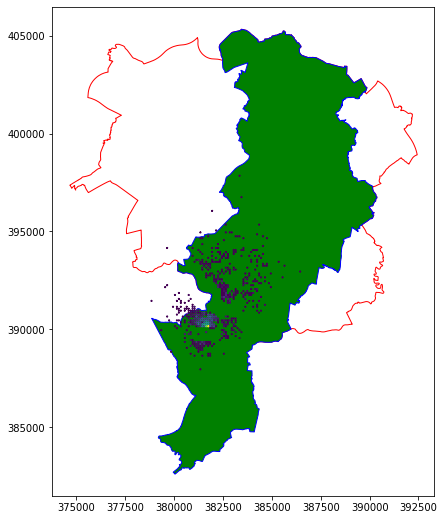

In [41]:
fig, ax = plt.subplots(1,1, figsize=(12,9))


manchester_map.plot(ax=ax,edgecolor='r',facecolor= 'white',linewidth=1)
man.plot(ax=ax,edgecolor='b',facecolor= 'g',linewidth=1)
gdf_data_000.plot(ax=ax,column='u',marker='*', markersize=2,legend=False,legend_kwds={'label': "Natural Log of Price per Night ($)",
                        'orientation': "vertical"})
